In [2]:
from ranx import Qrels, Run, evaluate
import bm25s
import Stemmer
from datasets import load_from_disk
from datasets import Dataset, DatasetDict
import numpy as np
import json
import pandas as pd
from collections import defaultdict
from typing import List, Dict
import random
import os
from src.utils.project_dirs import get_hfdata_dir

In [4]:
dataset_name = "sports"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 35597
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 35597
    })
})

In [21]:
dataset_dict['test'][0]['seen_asins'][-1]

NameError: name 'dataset_dict' is not defined

In [1]:
dataset_name = "beauty"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

NameError: name 'load_from_disk' is not defined

In [8]:
dataset_name = "toys"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 19395
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 969
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 19395
    })
})

In [2]:
dataset_name = "beauty2014"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 22363
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1118
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 22363
    })
})

In [2]:
dataset_name = "toys"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 19395
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 969
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 19395
    })
})

In [3]:
dataset_name = "sports"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 35597
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 35597
    })
})

In [5]:
dataset_name = "ml100k"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['user_id', 'text'],
        num_rows: 943
    })
    validation: Dataset({
        features: ['user_id', 'ptext', 'text', 'seen_movie_ids', 'movie_id', 'movie_id_text'],
        num_rows: 47
    })
    test: Dataset({
        features: ['user_id', 'ptext', 'text', 'seen_movie_ids', 'movie_id', 'movie_id_text'],
        num_rows: 943
    })
})

In [6]:
print(dataset_dict['train']['text'][2])

Below is a user's Movielens watch history in chronological order (earliest to latest). 
Each movie is represented by the following format: Title: <movie title>, Genres: <movie genres> 
Based on this history, predict **only one** movie the user is most likely to watch next in the same format.

### Watch history:
Title: L.A. Confidential (1997), Genres: Crime,Film-Noir,Mystery,Thriller
Title: Game, The (1997), Genres: Mystery,Thriller
Title: Scream (1996), Genres: Horror,Thriller
Title: Full Monty, The (1997), Genres: Comedy
Title: Contact (1997), Genres: Drama,Sci-Fi
Title: Titanic (1997), Genres: Action,Drama,Romance
Title: Boogie Nights (1997), Genres: Drama
Title: Kundun (1997), Genres: Drama
Title: Apostle, The (1997), Genres: Drama
Title: Career Girls (1997), Genres: Drama
Title: Eve's Bayou (1997), Genres: Drama
Title: Tomorrow Never Dies (1997), Genres: Action,Romance,Thriller
Title: Peacemaker, The (1997), Genres: Action,Thriller,War
Title: Chasing Amy (1997), Genres: Drama,Roma

In [7]:
print(dataset_dict['test']['ptext'][2])

Below is a user's Movielens watch history in chronological order (earliest to latest). 
Each movie is represented by the following format: Title: <movie title>, Genres: <movie genres> 
Based on this history, predict **only one** movie the user is most likely to watch next in the same format.

### Watch history:
Title: L.A. Confidential (1997), Genres: Crime,Film-Noir,Mystery,Thriller
Title: Game, The (1997), Genres: Mystery,Thriller
Title: Scream (1996), Genres: Horror,Thriller
Title: Full Monty, The (1997), Genres: Comedy
Title: Contact (1997), Genres: Drama,Sci-Fi
Title: Titanic (1997), Genres: Action,Drama,Romance
Title: Boogie Nights (1997), Genres: Drama
Title: Kundun (1997), Genres: Drama
Title: Apostle, The (1997), Genres: Drama
Title: Career Girls (1997), Genres: Drama
Title: Eve's Bayou (1997), Genres: Drama
Title: Tomorrow Never Dies (1997), Genres: Action,Romance,Thriller
Title: Peacemaker, The (1997), Genres: Action,Thriller,War
Title: Chasing Amy (1997), Genres: Drama,Roma

In [3]:
dataset_name = "ml1m"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['user_id', 'text'],
        num_rows: 6040
    })
    validation: Dataset({
        features: ['user_id', 'ptext', 'text', 'seen_movie_ids', 'movie_id', 'movie_id_text'],
        num_rows: 302
    })
    test: Dataset({
        features: ['user_id', 'ptext', 'text', 'seen_movie_ids', 'movie_id', 'movie_id_text'],
        num_rows: 6040
    })
})

In [4]:
print(dataset_dict['train']['text'][2])

Below is a user's Movielens watch history in chronological order (earliest to latest). 
Each movie is represented by the following format: Title: <movie title>, Genres: <movie genres> 
Based on this history, predict **only one** movie the user is most likely to watch next in the same format.

### Watch history:
Title: Starship Troopers (1997), Genres: Action,Adventure,Sci-Fi,War
Title: Star Wars: Episode IV - A New Hope (1977), Genres: Action,Adventure,Fantasy,Sci-Fi
Title: Raiders of the Lost Ark (1981), Genres: Action,Adventure
Title: Blade Runner (1982), Genres: Film-Noir,Sci-Fi
Title: Star Wars: Episode VI - Return of the Jedi (1983), Genres: Action,Adventure,Romance,Sci-Fi,War
Title: Meet the Parents (2000), Genres: Comedy
Title: Keeping the Faith (2000), Genres: Comedy,Romance
Title: EDtv (1999), Genres: Comedy
Title: Lone Star (1996), Genres: Drama,Mystery
Title: Star Wars: Episode V - The Empire Strikes Back (1980), Genres: Action,Adventure,Drama,Sci-Fi,War
Title: Godfather, Th

In [6]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['user_id', 'text'],
        num_rows: 6040
    })
    validation: Dataset({
        features: ['user_id', 'ptext', 'text', 'seen_movie_ids', 'movie_id', 'movie_id_text'],
        num_rows: 302
    })
    test: Dataset({
        features: ['user_id', 'ptext', 'text', 'seen_movie_ids', 'movie_id', 'movie_id_text'],
        num_rows: 6040
    })
})

In [5]:
print(dataset_dict['test']['ptext'][2])

Below is a user's Movielens watch history in chronological order (earliest to latest). 
Each movie is represented by the following format: Title: <movie title>, Genres: <movie genres> 
Based on this history, predict **only one** movie the user is most likely to watch next in the same format.

### Watch history:
Title: Starship Troopers (1997), Genres: Action,Adventure,Sci-Fi,War
Title: Star Wars: Episode IV - A New Hope (1977), Genres: Action,Adventure,Fantasy,Sci-Fi
Title: Raiders of the Lost Ark (1981), Genres: Action,Adventure
Title: Blade Runner (1982), Genres: Film-Noir,Sci-Fi
Title: Star Wars: Episode VI - Return of the Jedi (1983), Genres: Action,Adventure,Romance,Sci-Fi,War
Title: Meet the Parents (2000), Genres: Comedy
Title: Keeping the Faith (2000), Genres: Comedy,Romance
Title: EDtv (1999), Genres: Comedy
Title: Lone Star (1996), Genres: Drama,Mystery
Title: Star Wars: Episode V - The Empire Strikes Back (1980), Genres: Action,Adventure,Drama,Sci-Fi,War
Title: Godfather, Th

In [5]:
print(dataset_dict['train']['text'][2])

Below is a user's Movielens watch history in chronological order (earliest to latest). 
Each movie is represented by the following format: Title: <movie title>, Genres: <movie genres> 
Based on this history, predict **only one** movie the user is most likely to watch next in the same format.

### Watch history:
Title: L.A. Confidential (1997), Genres: Crime,Film-Noir,Mystery,Thriller
Title: Game, The (1997), Genres: Mystery,Thriller
Title: Scream (1996), Genres: Horror,Thriller
Title: Full Monty, The (1997), Genres: Comedy
Title: Contact (1997), Genres: Drama,Sci-Fi
Title: Titanic (1997), Genres: Action,Drama,Romance
Title: Boogie Nights (1997), Genres: Drama
Title: Kundun (1997), Genres: Drama
Title: Apostle, The (1997), Genres: Drama
Title: Career Girls (1997), Genres: Drama
Title: Eve's Bayou (1997), Genres: Drama
Title: Tomorrow Never Dies (1997), Genres: Action,Romance,Thriller
Title: Peacemaker, The (1997), Genres: Action,Thriller,War
Title: Chasing Amy (1997), Genres: Drama,Roma

In [1]:
print(dataset_dict['test']['ptext'][2])

NameError: name 'dataset_dict' is not defined

In [9]:
print(dataset_dict['test']['ptext'][2])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Vintage Pink Party Dress fits 18&quot; American Girl Dolls
Title: Cherry Dreams 18&quot; Dolls Pj and Slippers Fits American Girl
Title: Light Pink Glitter Shoes, Fits 18&quot; American Girl Dolls, Doll Accessories
Title: Lincoln Logs Classic Edition Tin
Title: Toysmith Kids Wooden Train Toy Whistle - Play Conductor Thomas

### Next item:



In [ ]:
print(dataset_dict['test']['text'][0])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Chutes and Ladders Super Hero Squad
Title: LeapFrog Letter Factory Phonics
Title: Crayola Art Smock-
Title: Crayola Giant Fingerpaint Paper, (99-3405)
Title: Gund Philbin 13&quot; Bear

### Next item:
Title: LeapFrog LeapPad2 Gel Skin - Blue(Works with LeapPad2 or LeapPad1)


In [5]:
print(dataset_dict['test']['ptext'][0])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Chutes and Ladders Super Hero Squad
Title: LeapFrog Letter Factory Phonics
Title: Crayola Art Smock-
Title: Crayola Giant Fingerpaint Paper, (99-3405)
Title: Gund Philbin 13&quot; Bear

### Next item:



In [6]:
print(dataset_dict['validation']['ptext'][0])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Schoenhut 25-Key My First Piano II, Red
Title: Fascinations AntWorks Colors of Life
Title: Fisher-Price Little People Disney Princess Songs Palace
Title: Scrabble Crossword Game

### Next item:



In [9]:
print(dataset_dict['test']['seen_asins'][0], dataset_dict['test']['asin'][1])

['B007IY97U0', 'B00870XLDS', 'B008MIRO88', 'B00BQYYMN0', 'B00GRTQBTM'] B000052YQU


In [11]:
print(dataset_dict['train'][0]['text'])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: 63cm Long Zipper Beige+pink Wavy Cosplay Hair Wig Rw157
Title: MapofBeauty Long Wave Curly Hair Wig Full Wig for Women Long (Black)
Title: MapofBeauty Cosplay Costume Long Curly Hair Wig Ladies Synthetic Wigs (White)
Title: 32&quot; 80cm Long Hair Heat Resistant Spiral Curly Cosplay Wig (Red Dark)

### Next item:
Title: MapofBeauty 28&quot; 70cm Long Curly Hair Ends Costume Cosplay Wig (Brown)


## Cold start, normal and power

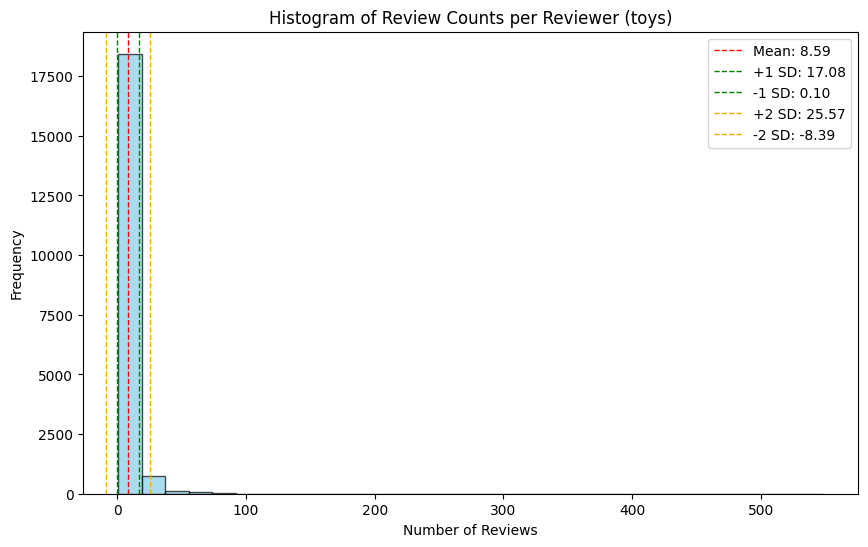

count    19406.000000
mean         8.593064
std          8.489433
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        548.000000
Name: count, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import argparse
from pathlib import Path
import urllib.parse

def visualize_reviewer_counts(df, category):
    """Visualizes the distribution of review counts per reviewer."""
    reviewer_counts = df['reviewerID'].value_counts()
    mean = reviewer_counts.mean()
    std = reviewer_counts.std()

    plt.figure(figsize=(10, 6))
    plt.hist(reviewer_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 SD: {mean + std:.2f}')
    plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 SD: {mean - std:.2f}')
    plt.axvline(mean + 2 * std, color='orange', linestyle='dashed', linewidth=1, label=f'+2 SD: {mean + 2 * std:.2f}')
    plt.axvline(mean - 2 * std, color='orange', linestyle='dashed', linewidth=1, label=f'-2 SD: {mean - 2 * std:.2f}')

    plt.title(f'Histogram of Review Counts per Reviewer ({category})')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    print(reviewer_counts.describe())

In [11]:
df = pd.read_json('../data/processed/beauty2014/df_dedup.json', lines=True)
reviewer_counts = df['reviewerID'].value_counts()
reviewer_counts.describe()

count    22363.000000
mean         8.870500
std          8.160898
min          4.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        204.000000
Name: count, dtype: float64

In [12]:
df = pd.read_json('../data/processed/sports2014/df_dedup.json', lines=True)
reviewer_counts = df['reviewerID'].value_counts()
reviewer_counts.describe()

count    35597.000000
mean         8.289772
std          6.052320
min          3.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        294.000000
Name: count, dtype: float64

In [13]:
df = pd.read_json('../data/processed/toys2014/df_dedup.json', lines=True)
reviewer_counts = df['reviewerID'].value_counts()
reviewer_counts.describe()

count    19406.000000
mean         8.593064
std          8.489433
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        548.000000
Name: count, dtype: float64

In [14]:
reviewer_counts

reviewerID
AJGU56YG8G1DQ     548
A1M8AYAL3L8ACP    168
A1II2ZRPKZAQQD    157
A2WW57XX2UVLM6    151
A1POFVVXUZR3IQ    133
                 ... 
A3W4D8XOGLWUN5      2
A2TCG2HV1VJP6V      2
A1L8YTICTVN5        1
AFV2584U13XP3       1
A1MHB1HRR6VPEH      1
Name: count, Length: 19406, dtype: int64

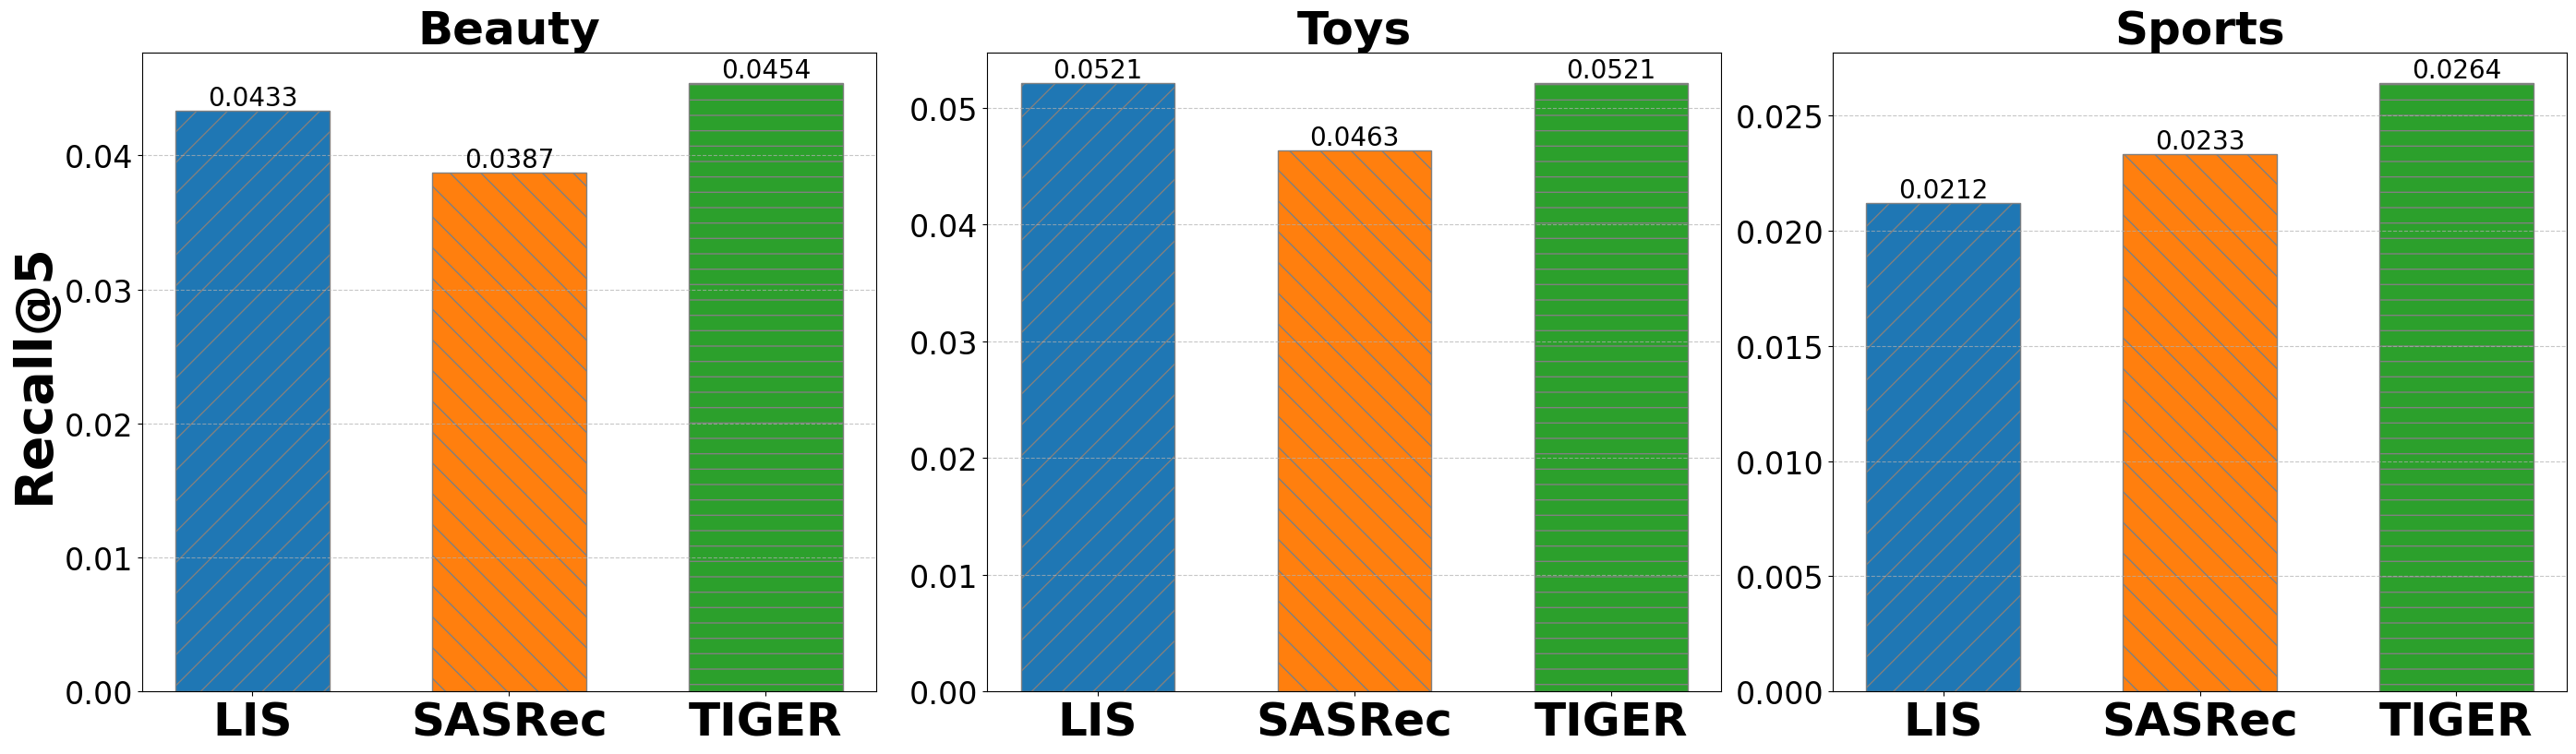

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the table, now without S3Rec
data = {
    'Model': ['LIS', 'SASRec', 'TIGER'],
    'Beauty_Recall@5': [0.0433, 0.0387, 0.0454],
    'Toys_Recall@5': [0.0521, 0.0463, 0.0521],
    'Sports_Recall@5': [0.0212, 0.0233, 0.0264],
}

df = pd.DataFrame(data)

# Set up the figure and axes for 3 subplots
# Increased figsize to give more room for the huge text
fig, axes = plt.subplots(1, 3, figsize=(28, 9), sharey=False)

datasets = ['Beauty', 'Toys', 'Sports']
# Consistent colors and hatches for each model
model_colors = {
    'LIS': '#1f77b4',  # Steel Blue
    'SASRec': '#ff7f0e', # Vivid Orange
    'TIGER': '#2ca02c'   # Forest Green
}
model_hatches = {
    'LIS': '/',
    'SASRec': '\\',
    'TIGER': '-'
}

# Width of a bar
bar_width = 0.6

for i, dataset in enumerate(datasets):
    ax = axes[i]

    # Get Recall@5 values for the current dataset
    recall_values = df[f'{dataset}_Recall@5']

    # Positions for the bars
    x_pos = np.arange(len(df['Model']))

    # Plotting Recall@5 for each model
    for j, model in enumerate(df['Model']):
        ax.bar(x_pos[j], recall_values[j],
               color=model_colors[model],
               width=bar_width,
               edgecolor='grey',
               label=model,
               hatch=model_hatches[model])

        # Added value labels on top of the bars with increased font size
        ax.text(x_pos[j], recall_values[j], f'{recall_values[j]:.4f}', ha='center', va='bottom', fontsize=20, color='black')

    # Add model names as x-axis labels with huge font size and bolding
    # This is where the change is: fontsize is set directly here
    ax.set_xticks(x_pos)
    ax.set_xticklabels(df['Model'], fontsize=36, weight='bold') # Set to 36 and bold

    # Set dataset title to be huge and bold
    ax.set_title(f'{dataset}', fontsize=36, weight='bold')

    # Set y-axis label only for the first subplot, making it super huge and bold
    if i == 0:
        ax.set_ylabel('Recall@5', fontsize=40, weight='bold')
    else:
        ax.set_ylabel('') # Remove y-label for other subplots

    # Ensure y-tick labels are also large
    ax.tick_params(axis='y', labelsize=24) # Increased y-tick label size

    # Removed ax.tick_params(axis='x', labelsize=18) as it conflicts/is redundant with set_xticklabels

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Optional: Legend on the last plot (uncomment if needed)
    # if i == 2:
    #     handles, labels = ax.get_legend_handles_labels()
    #     ax.legend(handles, labels, fontsize=24) # Increased legend font size

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../LIS-Recall5Plot.pdf')
# plt.show() # Uncomment if you want to see the plot immediately